# Goal

Predicting job placement during campus recruitment.

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, classification_report, log_loss, roc_auc_score, roc_curve, precision_score, accuracy_score

In [2]:
## Loadng the data
df = pd.read_csv("Placement_data_full_class.csv")

In [3]:
df.shape

(215, 15)

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Two columns are important here for us. **status** for the classification problem and the **salary** for the regression.
To beging, let's explore the data.

In [5]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

What does each of the columns mean:

- **ssc_b** = Board Of Education 
- **scc_p** = Secondary Education percentage
- **gender** = Male or Female
- **hsc_p** = Higher Secondary Education percentage
- **hsc_b** = Board Of Education
- **hsc_s** = Specialization in Higher Secondary Education
- **degree_p** = Degree Percentage
- **degree_t** = Under Graduation Degree Field
- **workex** = Work Experience
- **etest_p** = Employability test percentage
- **specialisation** = Post Graduate Specialization
- **mba_p** = MBA percentage
- **status** = Placed or not placed
- **salary** = The salary of the placed students or not placed students

# Exploratory Data Analysis

**First let's check the data and clean them if necessary**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
df.shape

(215, 15)

In [9]:
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [19]:
df["sl_no"]

0        1
1        2
2        3
3        4
4        5
      ... 
210    211
211    212
212    213
213    214
214    215
Name: sl_no, Length: 215, dtype: int64

In [3]:
## The column "sl_no" is just giving us the listing number of student. It is not important to analyze it, so let's drop it
df.drop(["sl_no"], axis=1, inplace=True)

In [4]:
# Let's check if there are some missing values
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
## Filling the missing values with 0
df.fillna(0, inplace=True)

In [6]:
# Checking again and there are no missing values
df.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

**Correlations, distributions and relationship Analasis**

In [22]:
corr_matrix = df.corr()

In [23]:
corr_matrix

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


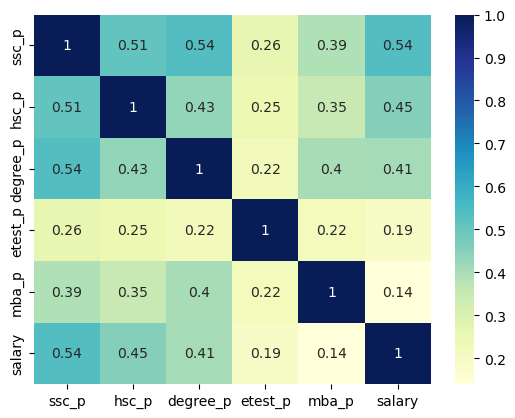

In [24]:
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [25]:
corr_matrix["salary"].sort_values(ascending=False)

salary      1.000000
ssc_p       0.538090
hsc_p       0.452569
degree_p    0.408371
etest_p     0.186988
mba_p       0.139823
Name: salary, dtype: float64

<Figure size 1400x1400 with 0 Axes>

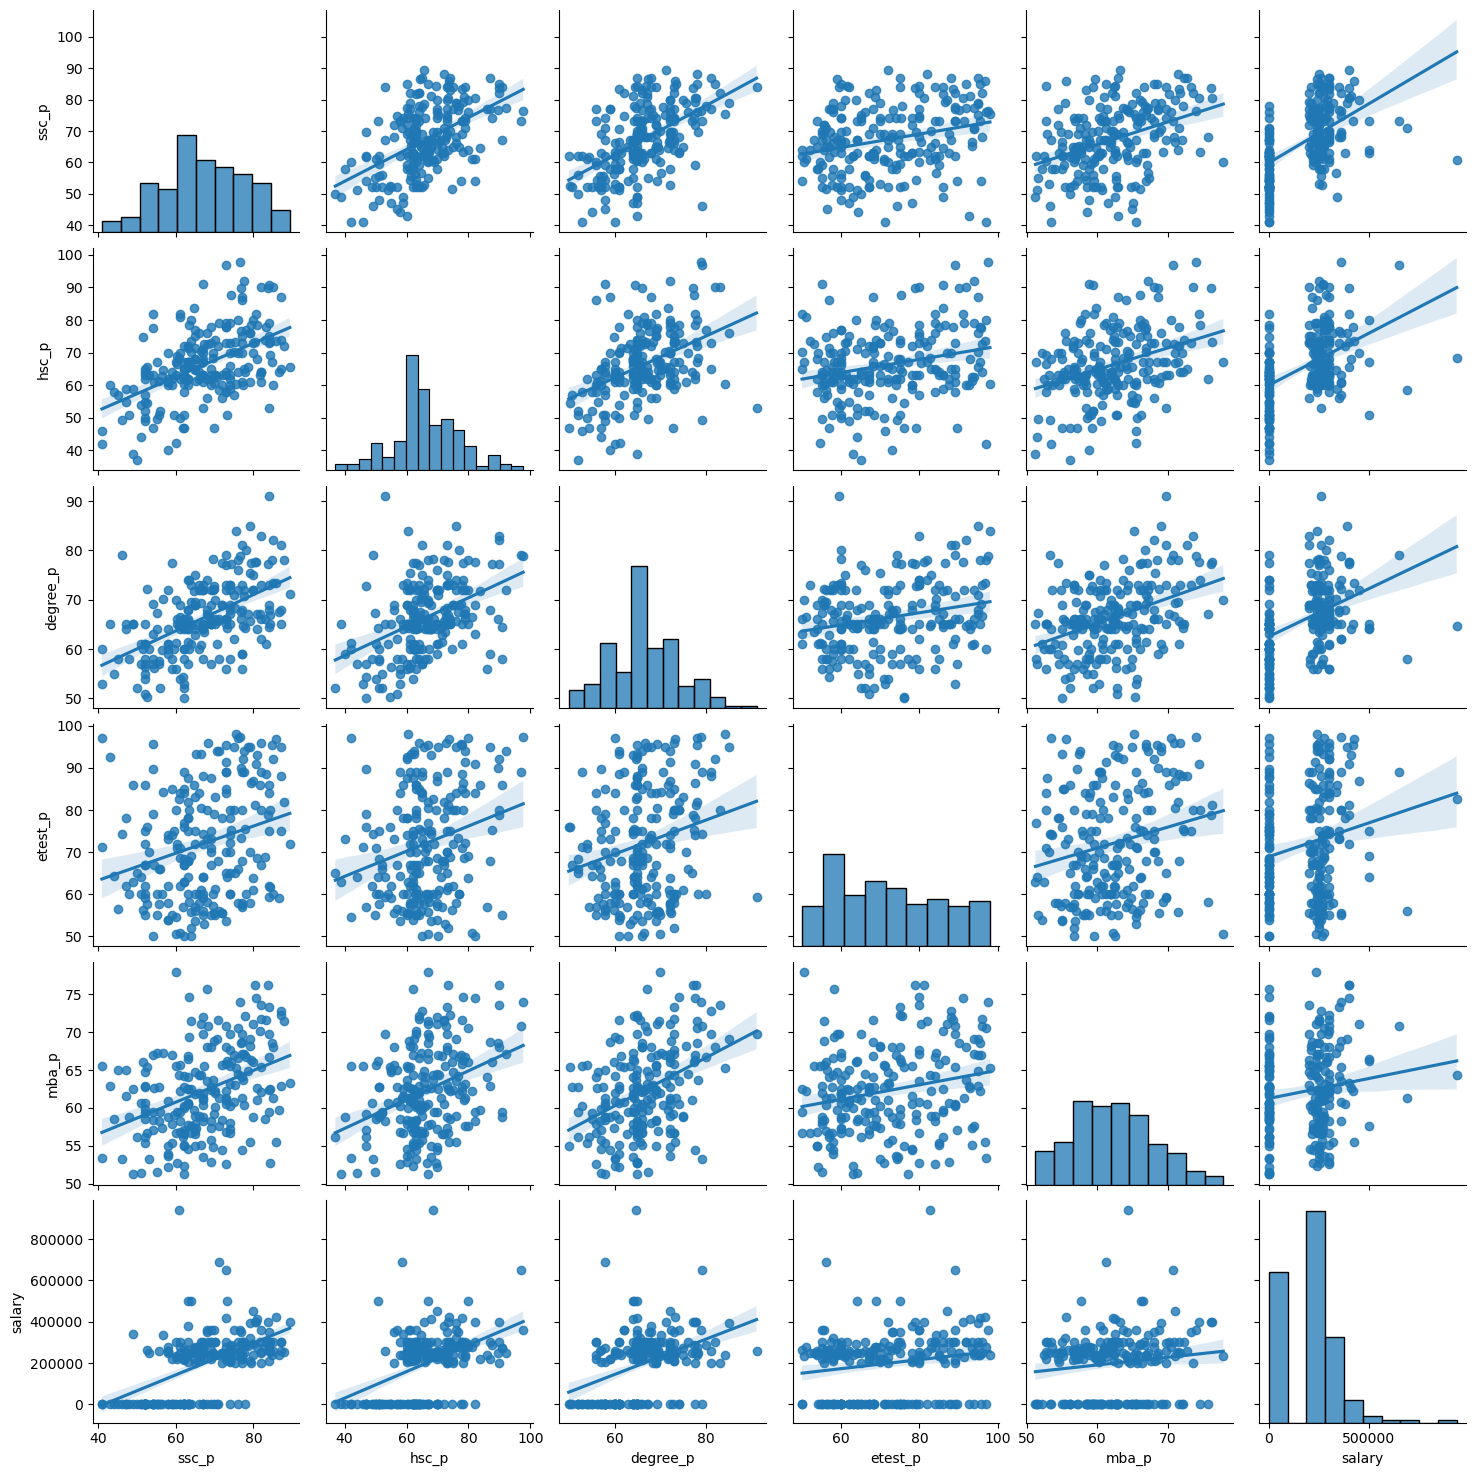

In [28]:
plt.figure(figsize=(14,14))
sns.pairplot(data=df, kind="reg")
plt.show()

**salary** is moderately correlated to **ssc_p** and has low possitive correlation with **hsc_p** and **degree_p** and finally has little correlation with **etest_p** and **mba_p**.

<Figure size 640x480 with 0 Axes>

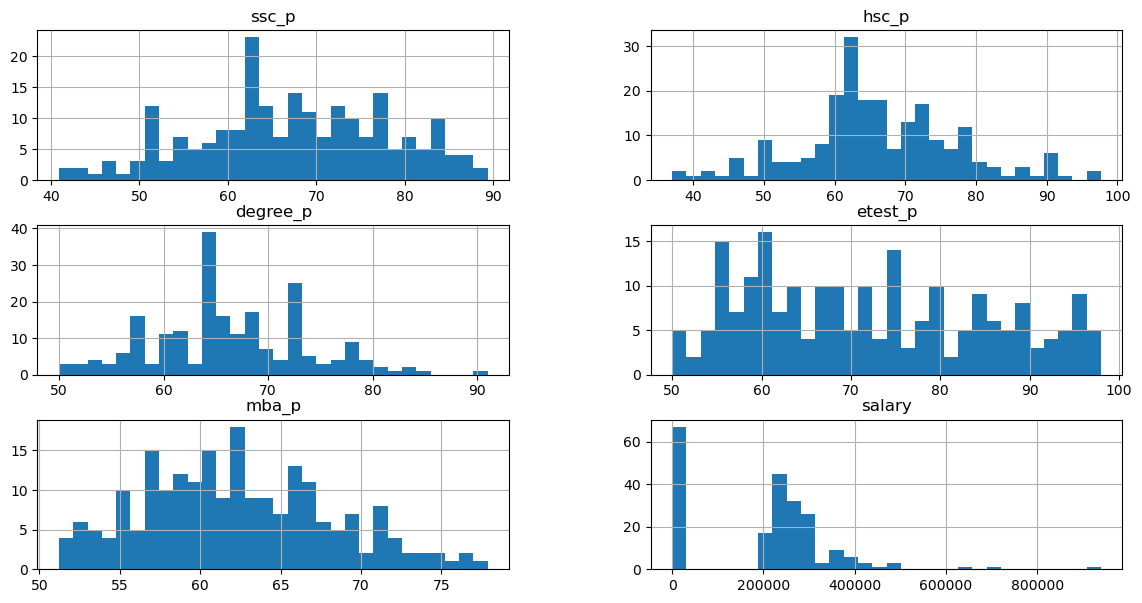

In [26]:
plt.figure()
df.hist(bins=30, figsize=(14,7))
plt.show()

Analyzing this figure, we can notice that the students have percentages in most above 50% with a majority located between 60 and 70%.
For the salary we have a great proportion of students that have not been placed; therefore their salary is equal to 0. However, for those who have been placed, the majority have a salary between 250k and 300k.

In [31]:
df_salary = df["salary"].apply(lambda x: 0 if x==0 else 1)
df_salary

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: salary, Length: 215, dtype: int64

In [30]:
from collections import Counter

In [35]:
Counter(df_salary)

148

In [38]:
print("percentage of students that have been placed", "{0:.2%}".format(Counter(df_salary)[1]/(Counter(df_salary)[1]+Counter(df_salary)[0])))
print("percentage of students that have not been placed", "{0:.2%}".format(Counter(df_salary)[0]/(Counter(df_salary)[1]+Counter(df_salary)[0])))

percentage of students that have been placed 68.84%
percentage of students that have not been placed 31.16%


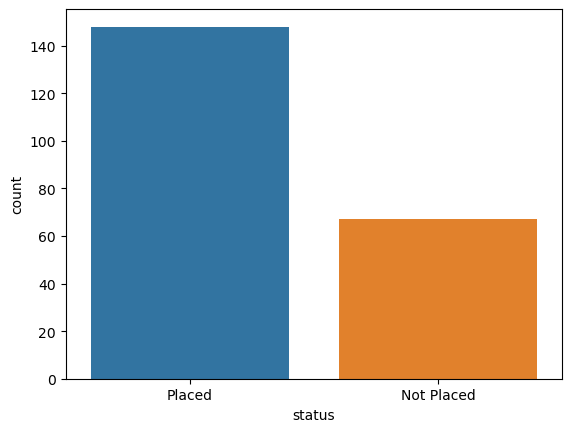

In [40]:
sns.countplot(x = "status", data=df)
plt.show()

The students that have not been placed represent almost 1/3 of the the total number of students.

**Analyzing the each feature with respect to salary and status**

In [41]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

**gender**

In [49]:
Counter(df.gender)

Counter({'M': 139, 'F': 76})

Women represent half the number of men.

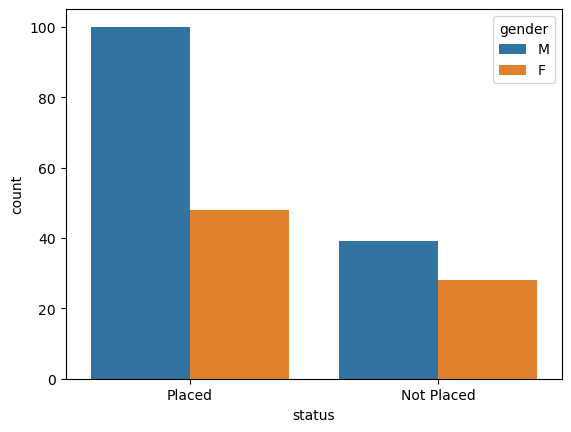

In [42]:
sns.countplot(x = "status", hue="gender", data=df)
plt.show()

Female students are less palced that the male and tin the category of "Not Placed" the proportion are almost he same.

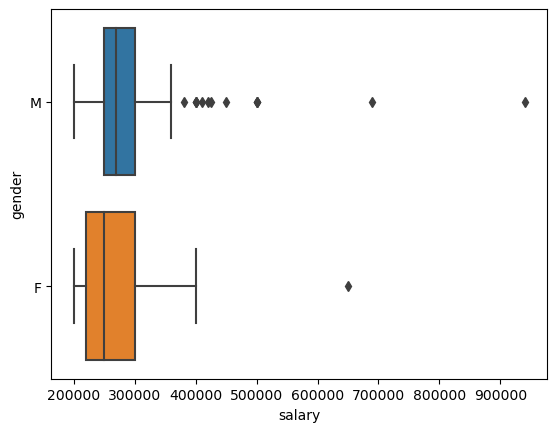

In [61]:
sns.boxplot(y="gender", x = "salary", data = df[df["salary"]>0])
plt.show()

Men are paid more than women.

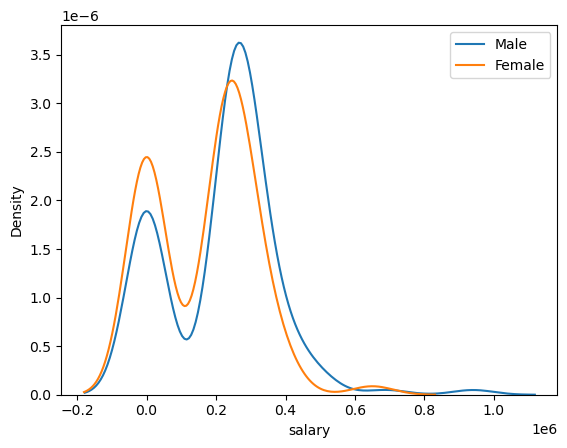

In [48]:
plt.figure()
sns.kdeplot(x = "salary", data = df[df["gender"] == "M"])
sns.kdeplot(x = "salary", data = df[df["gender"] == "F"])
plt.legend(["Male", "Female"])
plt.show()

Although men are paid more than women, the difference between their averages is not that great. Men are just slightly well paid than women.

**ssc_p: Secondary Education percentage**

In [50]:
df["ssc_p"]

0      67.00
1      79.33
2      65.00
3      56.00
4      85.80
       ...  
210    80.60
211    58.00
212    67.00
213    74.00
214    62.00
Name: ssc_p, Length: 215, dtype: float64

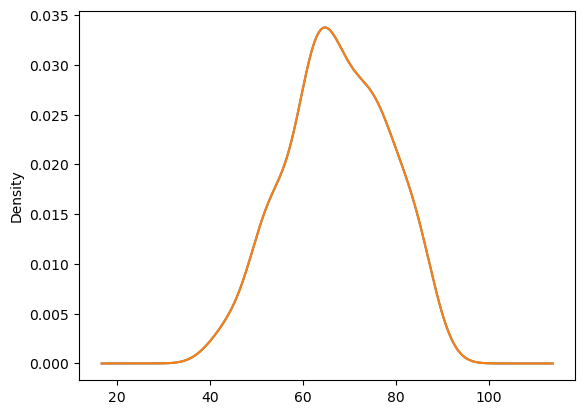

In [52]:
df["ssc_p"].plot.kde()
plt.show()

The percentages of **ssc** have a peak around 65%.

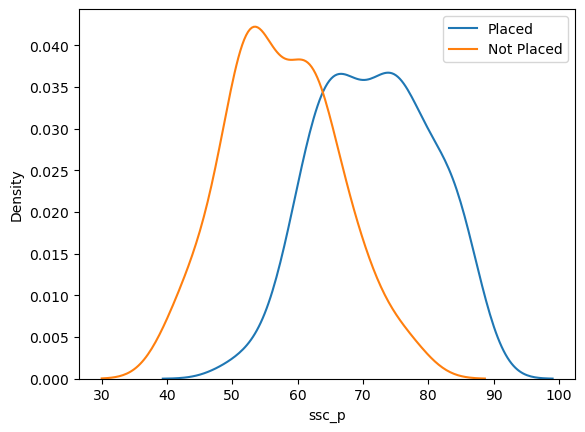

In [53]:
plt.figure()
sns.kdeplot(x = "ssc_p", data = df[df["status"] == "Placed"])
sns.kdeplot(x = "ssc_p", data = df[df["status"] == "Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.show()

Students that have not been placed have lower percentages than those that have been placed.

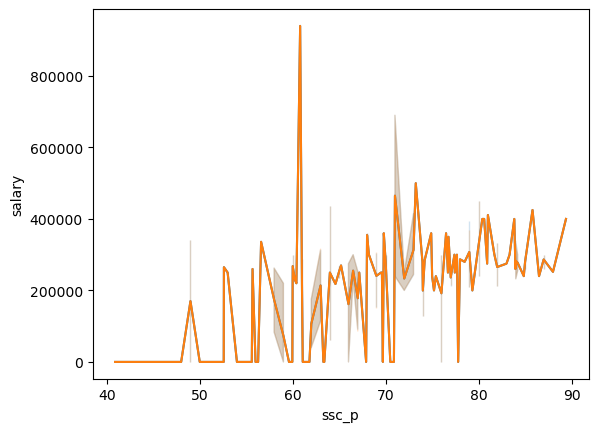

In [55]:
sns.lineplot(x="ssc_p", y="salary", data=df)
plt.show()

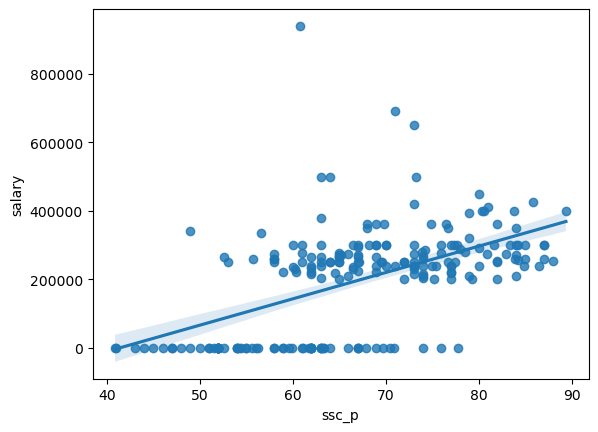

In [56]:
sns.regplot(x="ssc_p", y="salary", data=df)
plt.show()

To summarize, the higher the percentage, the higher the salary.

**ssc_b: Board Of Education**

In [57]:
df["ssc_b"]

0       Others
1      Central
2      Central
3      Central
4      Central
        ...   
210     Others
211     Others
212     Others
213     Others
214    Central
Name: ssc_b, Length: 215, dtype: object

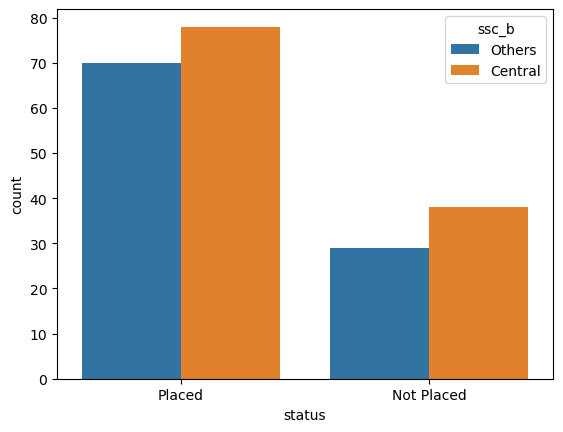

In [58]:
sns.countplot(x = "status", hue="ssc_b", data=df)
plt.show()

Students that have been placed are slightly more located at the central than at the others. The same remark for students that have not been placed.

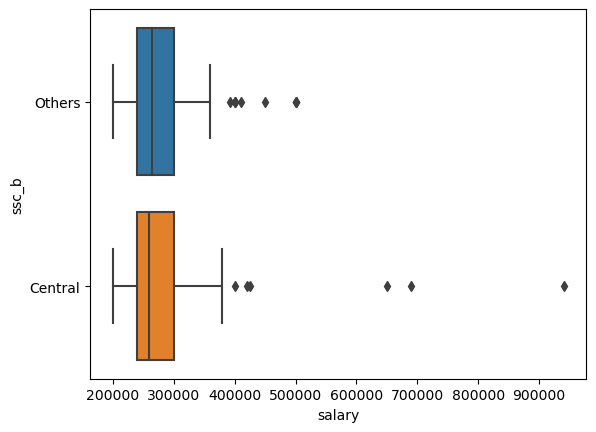

In [60]:
sns.boxplot(y="ssc_b", x = "salary", data = df[df["salary"]> 0])
plt.show()

In [65]:
df[(df["salary"]> 0) & (df["ssc_b"] == "Others")]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.0,Others,91.0,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
19,M,60.0,Others,67.0,Others,Arts,70.00,Comm&Mgmt,Yes,50.48,Mkt&Fin,77.89,Placed,236000.0
20,M,62.0,Others,65.0,Others,Commerce,66.00,Comm&Mgmt,No,50.00,Mkt&HR,56.70,Placed,265000.0
21,F,79.0,Others,76.0,Others,Commerce,85.00,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
22,F,69.8,Others,60.8,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,M,61.0,Others,62.0,Others,Commerce,65.00,Comm&Mgmt,No,62.00,Mkt&Fin,56.81,Placed,250000.0
210,M,80.6,Others,82.0,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
211,M,58.0,Others,60.0,Others,Science,72.00,Sci&Tech,No,74.00,Mkt&Fin,53.62,Placed,275000.0
212,M,67.0,Others,67.0,Others,Commerce,73.00,Comm&Mgmt,Yes,59.00,Mkt&Fin,69.72,Placed,295000.0


<Figure size 640x480 with 0 Axes>

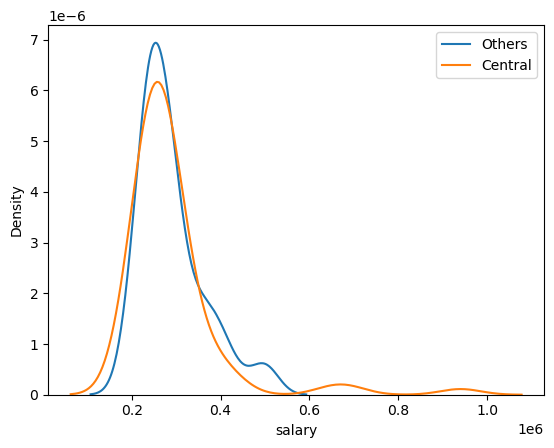

In [66]:
plt.figure()
sns.kdeplot(x = "salary", data = df[(df["salary"]> 0) & (df["ssc_b"] == "Others")])
sns.kdeplot(x = "salary", data = df[(df["salary"]> 0) & (df["ssc_b"] == "Central")])
plt.legend(["Others", "Central"])
plt.show()

Students at the other institutions were on average paid slightly more than those at the central institution. Nevertheless, central students were offered high salaries, as shown by the outliers.

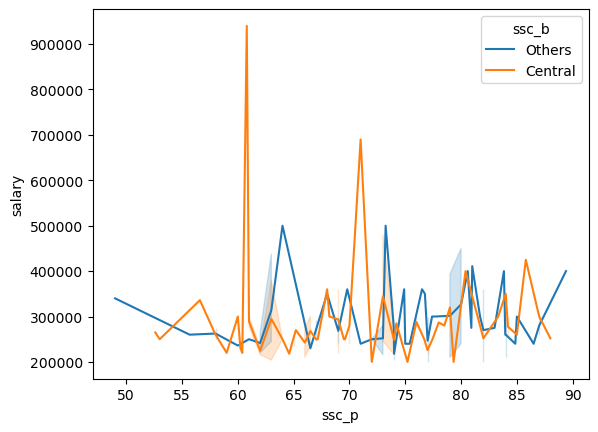

In [70]:
sns.lineplot(x="ssc_p", y="salary", hue="ssc_b", data=df[df.salary >0])
plt.show()

Nothing can be said regarding this figure because combined ssc_p and ssc_b are not having any effect on the salary.

**hsc_p: Higher Secondary Education percentage**

In [68]:
df["hsc_p"]

0      91.00
1      78.33
2      68.00
3      52.00
4      73.60
       ...  
210    82.00
211    60.00
212    67.00
213    66.00
214    58.00
Name: hsc_p, Length: 215, dtype: float64

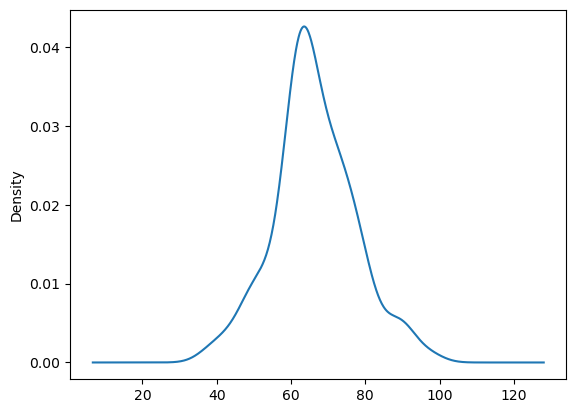

In [71]:
df["hsc_p"].plot.kde()
plt.show()

Most of the hsc_p are located between 60 and 70%.

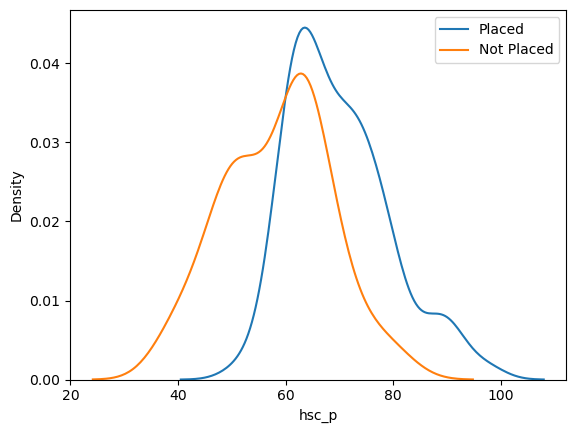

In [72]:
plt.figure()
sns.kdeplot(x = "hsc_p", data = df[df["status"] == "Placed"])
sns.kdeplot(x = "hsc_p", data = df[df["status"] == "Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.show()

Students that are placed have better hsc_p than those that have not.

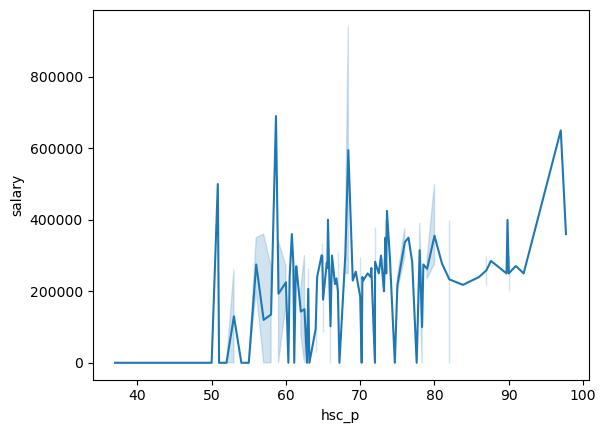

In [73]:
sns.lineplot(x="hsc_p", y="salary", data=df)
plt.show()

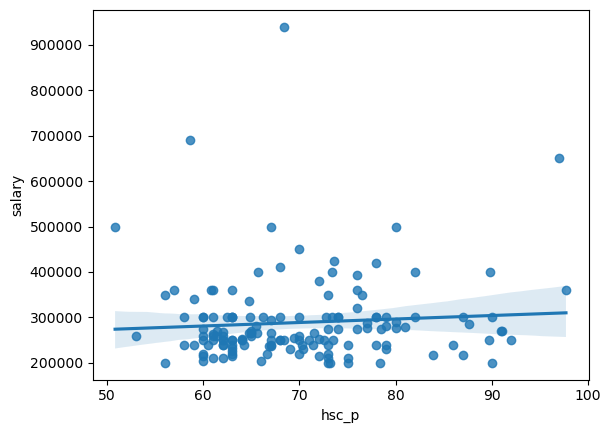

In [75]:
sns.regplot(x="hsc_p", y="salary", data=df[df.salary>0])
plt.show()

The more the hsc_p increases the more the salary increases slightly.

**hsc_b: Board Of Education**

In [76]:
df["hsc_b"]

0       Others
1       Others
2      Central
3      Central
4      Central
        ...   
210     Others
211     Others
212     Others
213     Others
214     Others
Name: hsc_b, Length: 215, dtype: object

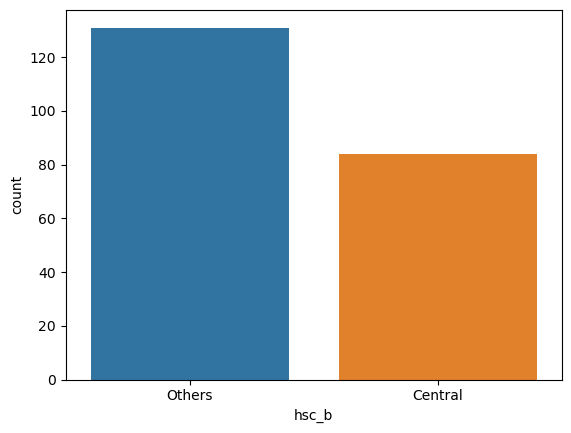

In [77]:
sns.countplot(x="hsc_b", data=df)
plt.show()

Others institutions are more represented than the central institution.

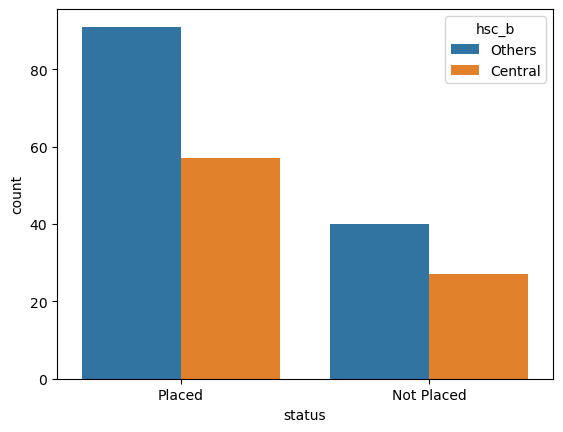

In [78]:
sns.countplot(x = "status", hue="hsc_b", data=df)
plt.show()

No matter the group (Placed or Not Played) the proportion of Others is greater than the Central.

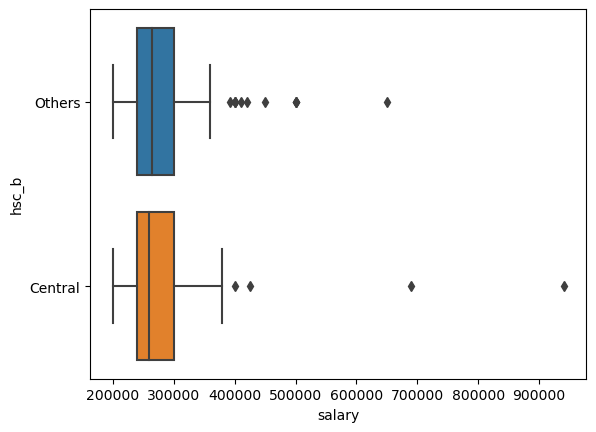

In [80]:
sns.boxplot(y="hsc_b", x = "salary", data = df[df["salary"]> 0])
plt.show()

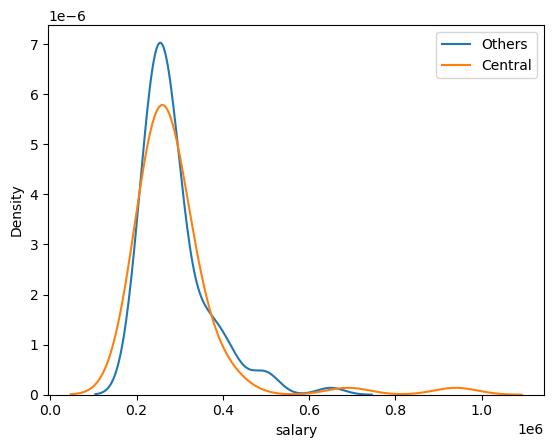

In [81]:
plt.figure()
sns.kdeplot(x = "salary", data = df[(df["salary"]> 0) & (df["hsc_b"] == "Others")])
sns.kdeplot(x = "salary", data = df[(df["salary"]> 0) & (df["hsc_b"] == "Central")])
plt.legend(["Others", "Central"])
plt.show()

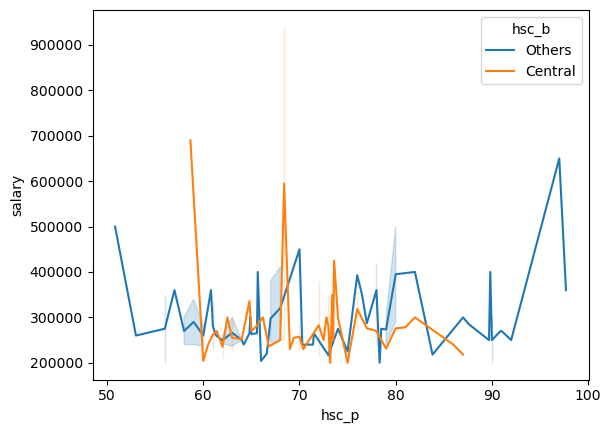

In [82]:
sns.lineplot(x="hsc_p", y="salary", hue="hsc_b", data=df[df.salary >0])
plt.show()

Students at other institutions have a slightly higher salary than the central students. The latter have a max salary higher than the Others students.

**degree_p: Degree Percentage**

In [86]:
df["degree_p"]

0      58.00
1      77.48
2      64.00
3      52.00
4      73.30
       ...  
210    77.60
211    72.00
212    73.00
213    58.00
214    53.00
Name: degree_p, Length: 215, dtype: float64

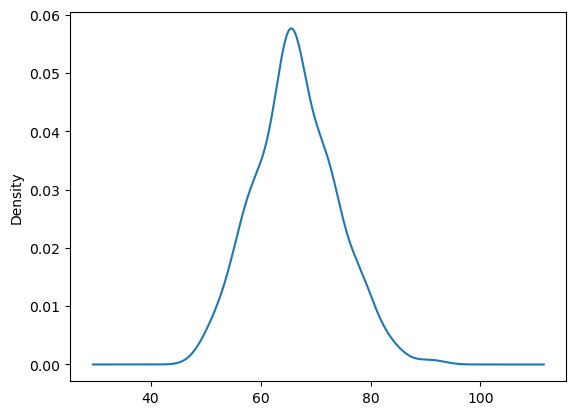

In [87]:
df["degree_p"].plot.kde()
plt.show()

A peak can be observed around 65% to 68%.

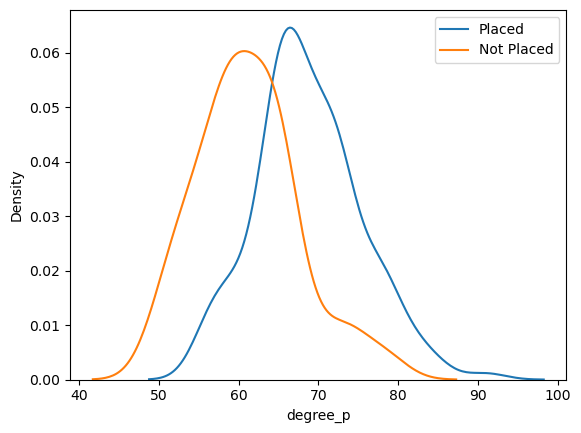

In [88]:
plt.figure()
sns.kdeplot(x = "degree_p", data = df[df["status"] == "Placed"])
sns.kdeplot(x = "degree_p", data = df[df["status"] == "Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.show()

Students that have not been placed have lower degree_p than the placed ones.

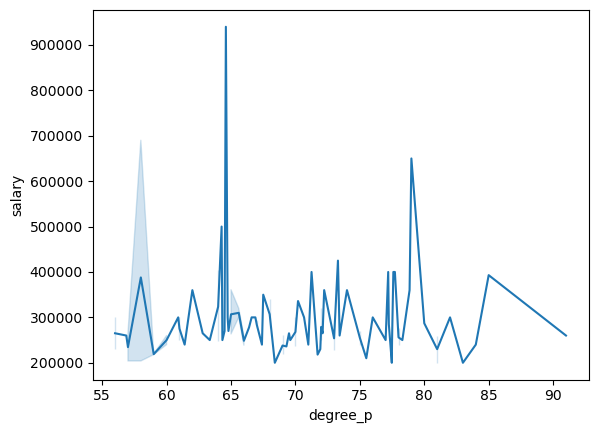

In [92]:
sns.lineplot(x="degree_p", y="salary", data=df[df.salary>0])
plt.show()

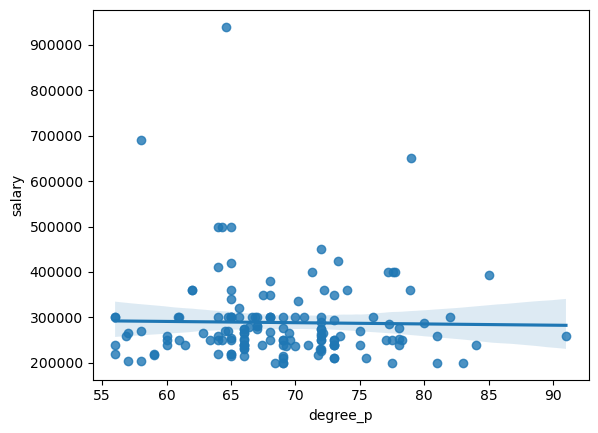

In [91]:
sns.regplot(x="degree_p", y="salary", data=df[df.salary>0])
plt.show()

The degree_p does not have any effect on the salary.

**degree_t: Under Graduation Degree Field**

In [93]:
df["degree_t"]

0       Sci&Tech
1       Sci&Tech
2      Comm&Mgmt
3       Sci&Tech
4      Comm&Mgmt
         ...    
210    Comm&Mgmt
211     Sci&Tech
212    Comm&Mgmt
213    Comm&Mgmt
214    Comm&Mgmt
Name: degree_t, Length: 215, dtype: object

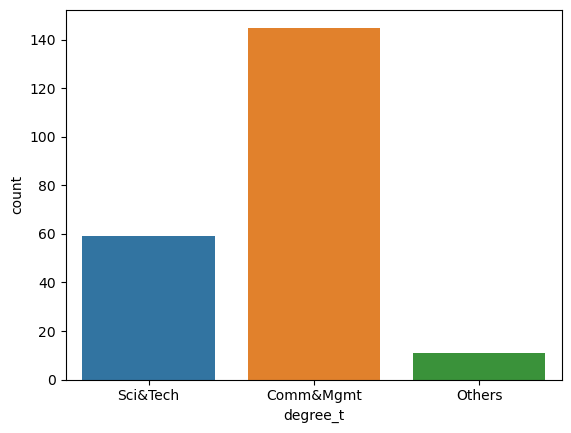

In [95]:
sns.countplot(x="degree_t", data=df)
plt.show()

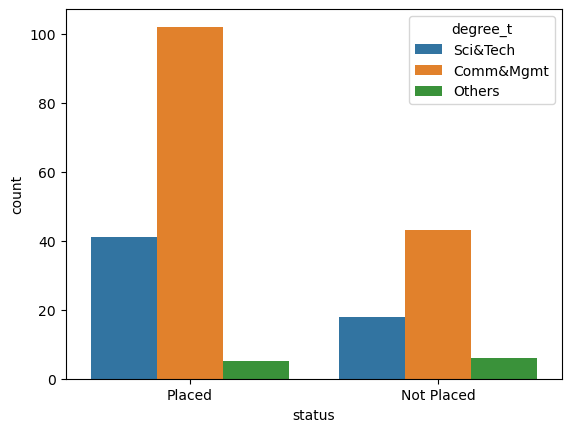

In [96]:
sns.countplot(x = "status", hue="degree_t", data=df)
plt.show()

Students from Comm&Mgmt are more represented, followed by the Sci&Tech and finally the other fields. This representation is also kept for students pced or not.

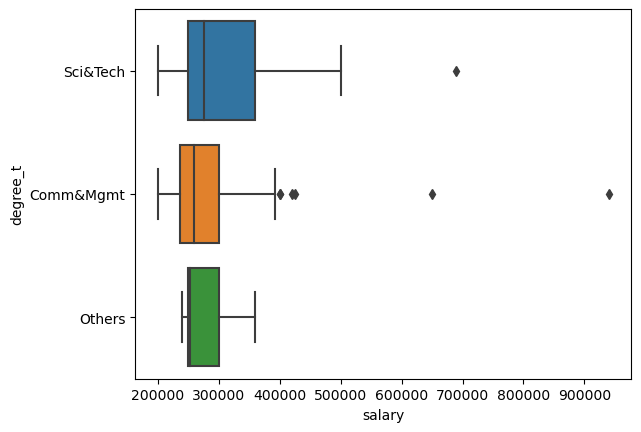

In [97]:
sns.boxplot(y="degree_t", x = "salary", data = df[df["salary"]> 0])
plt.show()

In [102]:
df["degree_t"].unique()[0]

'Sci&Tech'

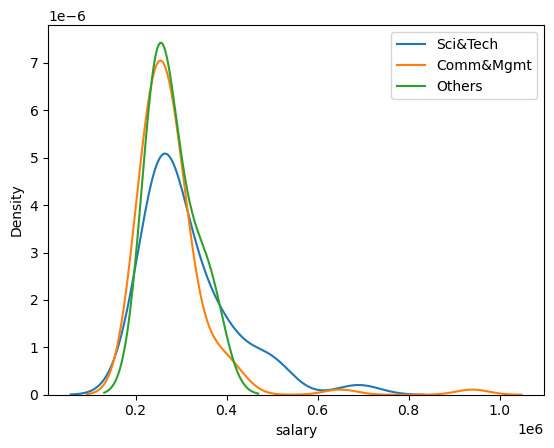

In [103]:
plt.figure()
sns.kdeplot(x = "salary", data = df[(df["salary"]> 0) & (df["degree_t"] == df["degree_t"].unique()[0])])
sns.kdeplot(x = "salary", data = df[(df["salary"]> 0) & (df["degree_t"] == df["degree_t"].unique()[1])])
sns.kdeplot(x = "salary", data = df[(df["salary"]> 0) & (df["degree_t"] == df["degree_t"].unique()[2])])

plt.legend(df["degree_t"].unique())
plt.show()

Sci&Tech students have salary than Comm&Mgmt. The least paid are Other fields students. Due to the outliers of the Comm&Mgmt, we can conclude that their max salary is higher the other fields.

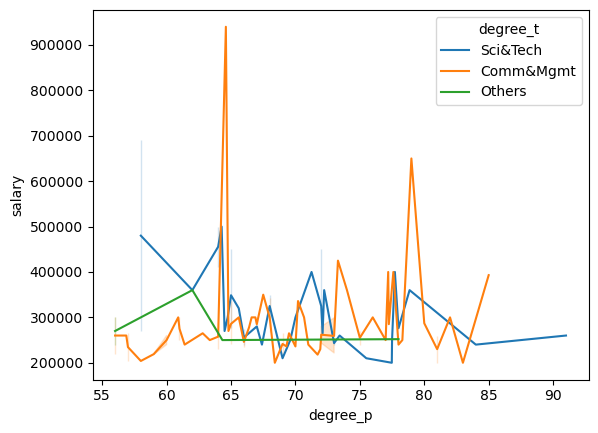

In [104]:
sns.lineplot(x="degree_p", y="salary", hue="degree_t", data=df[df.salary >0])
plt.show()

No conclusion can be made regarding the combination of degree_p and degree_t about their effect on the salary.

**workex: Work Experience**

In [105]:
df["workex"]

0       No
1      Yes
2       No
3       No
4       No
      ... 
210     No
211     No
212    Yes
213     No
214     No
Name: workex, Length: 215, dtype: object

In [109]:
Counter(df["workex"])["No"]

141

In [112]:
print("Percentage of students that have work experience:", "{0:.2%}".format(Counter(df["workex"])["Yes"]/(Counter(df["workex"])["Yes"]+Counter(df["workex"])["No"])))
print("Percentage of students that have not work experience:", "{0:.2%}".format(Counter(df["workex"])["No"]/(Counter(df["workex"])["Yes"]+Counter(df["workex"])["No"])))

Percentage of students that have work experience: 34.42%
Percentage of students that have not work experience: 65.58%


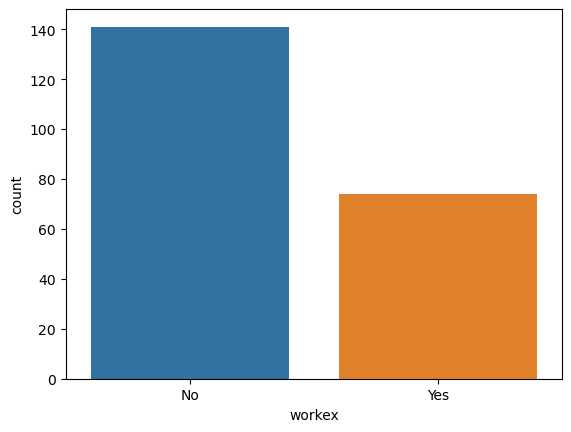

In [106]:
sns.countplot(x = "workex", data=df)
plt.show()

The majority of students have no work experience.

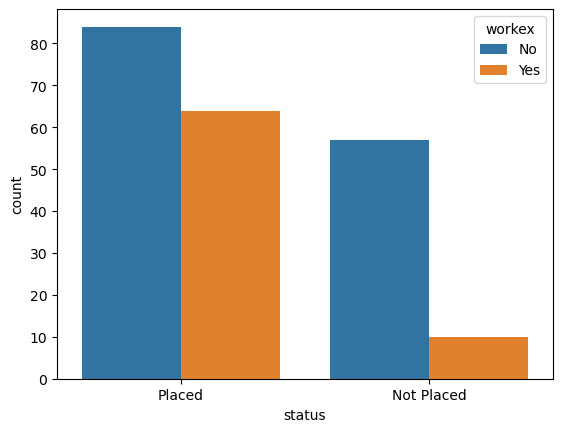

In [113]:
sns.countplot(x = "status", hue="workex", data=df)
plt.show()

It is preferable to have professional experience.

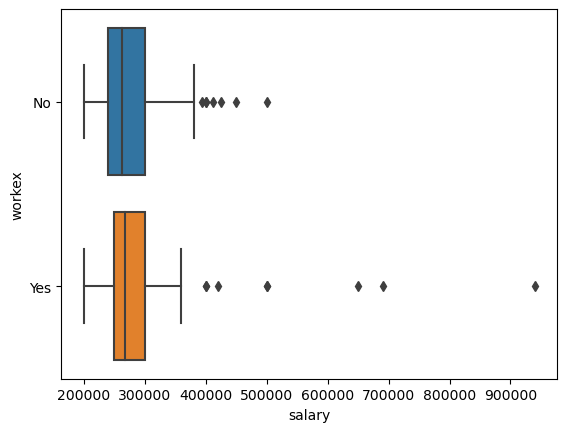

In [114]:
sns.boxplot(y="workex", x = "salary", data = df[df["salary"]> 0])
plt.show()

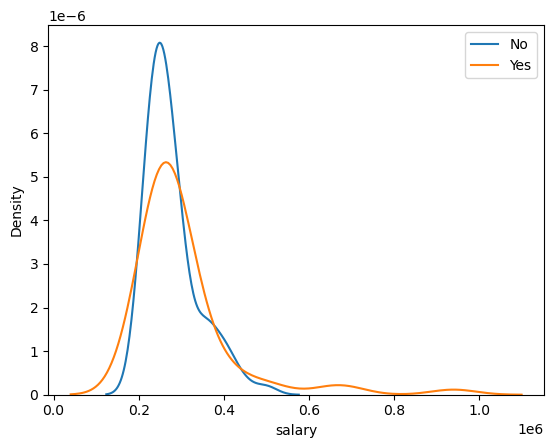

In [115]:
plt.figure()
sns.kdeplot(x = "salary", data = df[(df["salary"]> 0) & (df["workex"] == df["workex"].unique()[0])])
sns.kdeplot(x = "salary", data = df[(df["salary"]> 0) & (df["workex"] == df["workex"].unique()[1])])

plt.legend(df["workex"].unique())
plt.show()

Students with work experience are paid slightly more than those without. In addition, students with work experience have some outliers show that some individuals are even highly paid.

**etest_p: Employability test percentage**

In [116]:
df["etest_p"]

0      55.0
1      86.5
2      75.0
3      66.0
4      96.8
       ... 
210    91.0
211    74.0
212    59.0
213    70.0
214    89.0
Name: etest_p, Length: 215, dtype: float64

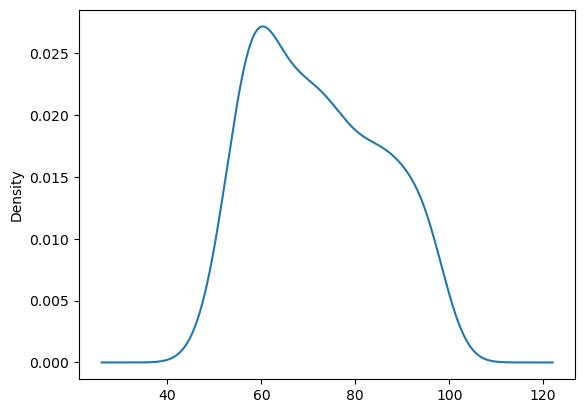

In [117]:
df["etest_p"].plot.kde()
plt.show()

Most of the etest_p are located between 60 and 100%.

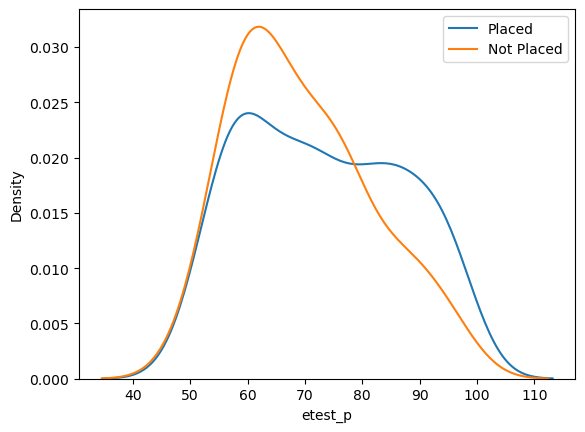

In [118]:
plt.figure()
sns.kdeplot(x = "etest_p", data = df[df["status"] == "Placed"])
sns.kdeplot(x = "etest_p", data = df[df["status"] == "Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.show()

It is preferable to have high etest_p to be placed.

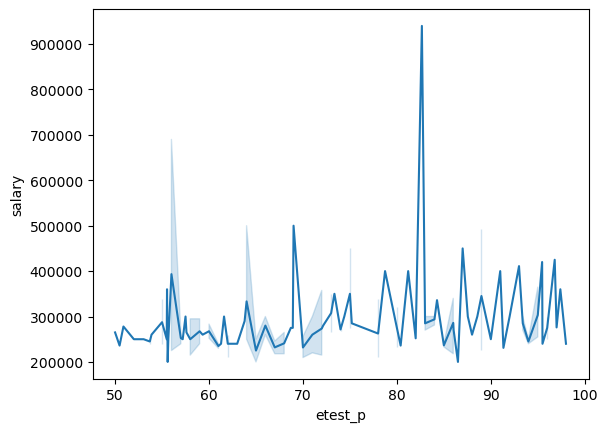

In [119]:
sns.lineplot(x="etest_p", y="salary", data=df[df.salary>0])
plt.show()

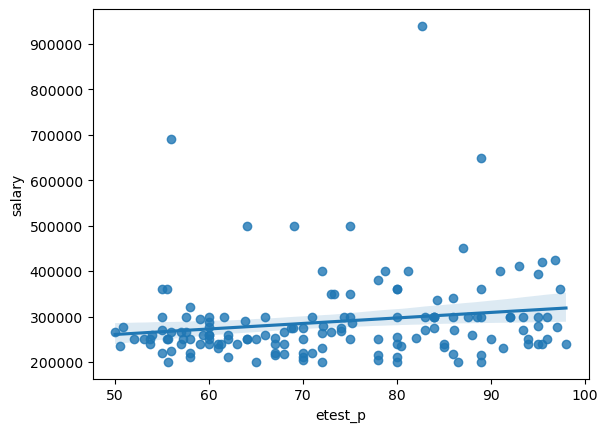

In [120]:
sns.regplot(x="etest_p", y="salary", data=df[df.salary>0])
plt.show()

High etest_p means salary slightly high.

**specialisation: Post Graduate Specialization**

In [121]:
df["specialisation"]

0       Mkt&HR
1      Mkt&Fin
2      Mkt&Fin
3       Mkt&HR
4      Mkt&Fin
        ...   
210    Mkt&Fin
211    Mkt&Fin
212    Mkt&Fin
213     Mkt&HR
214     Mkt&HR
Name: specialisation, Length: 215, dtype: object

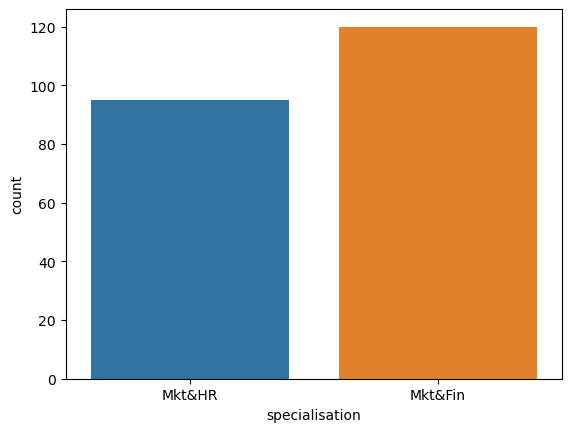

In [122]:
sns.countplot(x = "specialisation", data=df)
plt.show()

Students in Mik&Fin are higher than ones in Mkt&HR.

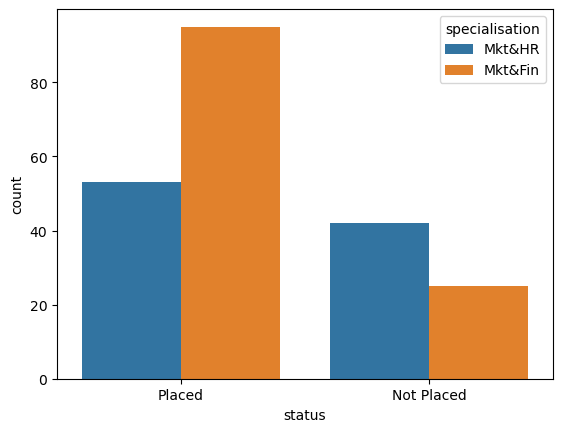

In [123]:
sns.countplot(x = "status", hue="specialisation", data=df)
plt.show()

Students in Mik&Fin are more placed than ones in Mkt&HR.

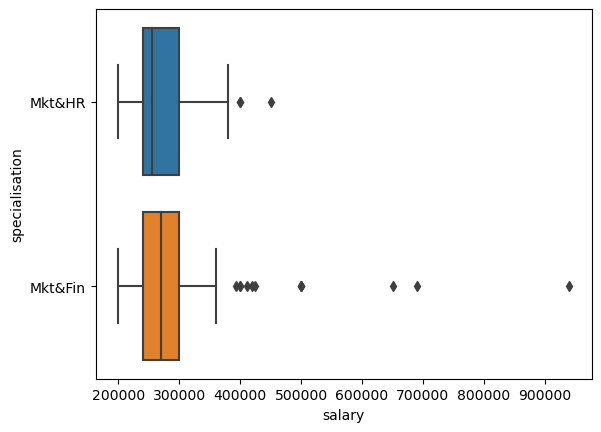

In [124]:
sns.boxplot(y="specialisation", x = "salary", data = df[df["salary"]> 0])
plt.show()

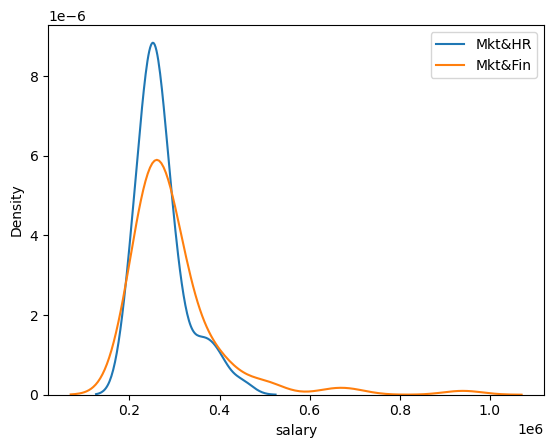

In [125]:
plt.figure()
sns.kdeplot(x = "salary", data = df[(df["salary"]> 0) & (df["specialisation"] == df["specialisation"].unique()[0])])
sns.kdeplot(x = "salary", data = df[(df["salary"]> 0) & (df["specialisation"] == df["specialisation"].unique()[1])])

plt.legend(df["specialisation"].unique())
plt.show()

Students in Mik&Fin are more paid than ones in Mkt&HR.

**mba_p: MBA percentage**

In [127]:
df["mba_p"]

0      58.80
1      66.28
2      57.80
3      59.43
4      55.50
       ...  
210    74.49
211    53.62
212    69.72
213    60.23
214    60.22
Name: mba_p, Length: 215, dtype: float64

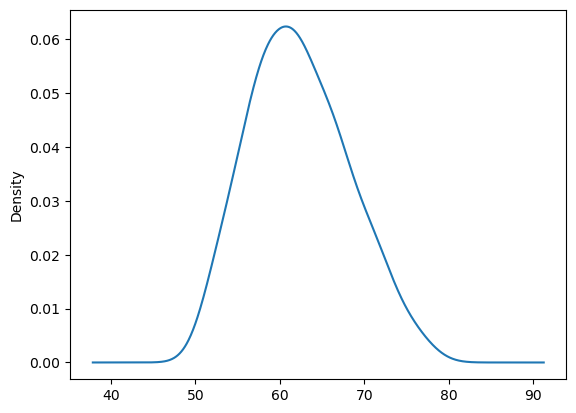

In [128]:
df["mba_p"].plot.kde()
plt.show()

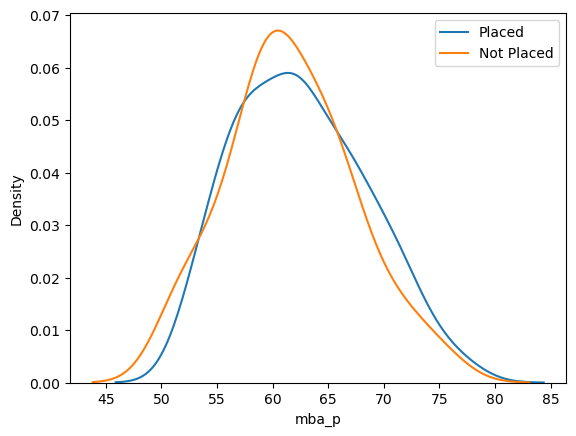

In [129]:
plt.figure()
sns.kdeplot(x = "mba_p", data = df[df["status"] == "Placed"])
sns.kdeplot(x = "mba_p", data = df[df["status"] == "Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.show()

Students that are placed have the mba_p slightly greater than the students that have not been placed.

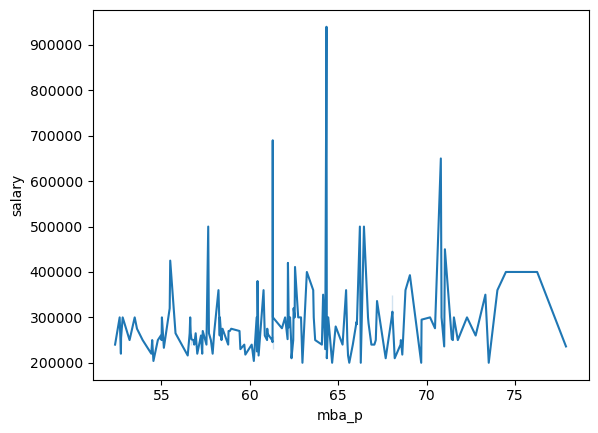

In [130]:
sns.lineplot(x="mba_p", y="salary", data=df[df.salary>0])
plt.show()

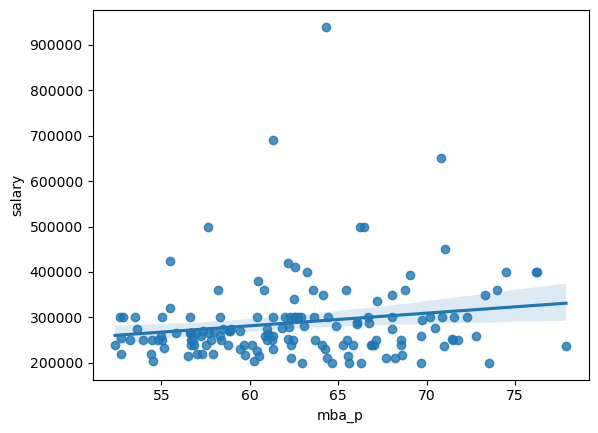

In [131]:
sns.regplot(x="mba_p", y="salary", data=df[df.salary>0])
plt.show()

The more the mba_p the more is slightly great the salary.

**status: Placed or not placed**

In [132]:
df["status"]

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

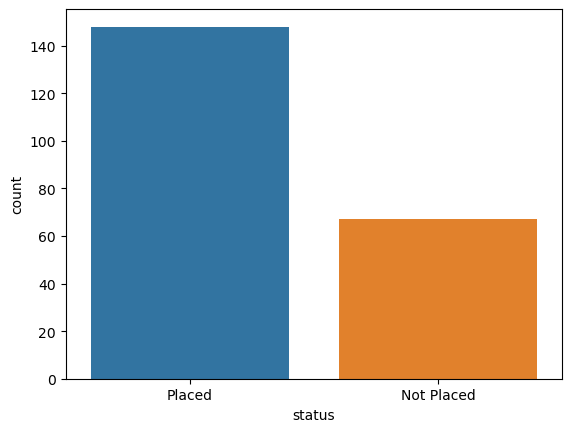

In [133]:
sns.countplot(x="status", data=df)
plt.show()

# Splitting the data into features and target columns

In [7]:
df_train = df.drop(["status", "salary"], axis=1)
df_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23


In [8]:
df_clf = df["status"]
df_clf

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [9]:
df_clf = df_clf.map(dict([("Placed", 1), ("Not Placed", 0)]))
df_clf

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [10]:
df_reg = df["salary"]
df_reg

0      270000.0
1      200000.0
2      250000.0
3           0.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 215, dtype: float64

In [87]:
df_train["status"] = df_clf

In [88]:
df_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,1
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,1
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,1


# Regression problem

**Preparing the data using Pipelines**

In [89]:
## Splitting numerical and object columns
cat_names = []
num_names = []

for col in df_train.columns:
    if df_train[col].dtype == "O":
        cat_names.append(col)
    else:
        num_names.append(col)

In [90]:
cat_names

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

In [91]:
num_names

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status']

In [124]:
class AttributesSelection(BaseEstimator, TransformerMixin):
    def __init__(self, num_attributes_selected):
        self.num_attributes_selected = num_attributes_selected
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_selected = X[self.num_attributes_selected]
        return X_selected

In [125]:
## Pipeline for numerical Attributes
num_pipeline = Pipeline([
    ("select_num", AttributesSelection(num_names)),
    
])

In [126]:
## Pipeline for object Attributes
cat_pipeline = Pipeline([
    ("select_cat", AttributesSelection(cat_names)),
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [127]:
## Merging the two pipelines
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    
])

In [128]:
df_train_transformed = full_pipeline.fit_transform(df_train)

**Modeling**

In [129]:
X_train, X_test, y_train, y_test = train_test_split(df_train_transformed, df_reg, test_size=0.20, random_state=3)

In [130]:
y_train

58     268000.0
199    265000.0
105         0.0
64     240000.0
41          0.0
         ...   
200    300000.0
184         0.0
131    360000.0
152    240000.0
106         0.0
Name: salary, Length: 172, dtype: float64

In [131]:
scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

In [132]:
scal_y = StandardScaler()

In [133]:
y_train = scal_y.fit_transform(np.array(y_train).reshape(-1,1))

In [134]:
y_test = scal_y.transform(np.array(y_test).reshape(-1,1))

In [135]:
X_test.shape

(43, 22)

In [136]:
y_test.shape

(43, 1)

In [137]:
X_train.shape

(172, 22)

In [138]:
y_train.shape

(172, 1)

In [139]:
def evaluateTheModel(model, test_X, test_Y):
    model.fit(X_train, y_train)
    y_pred = model.predict(test_X)
    
    r2 = r2_score(test_Y, y_pred)
    rmse = np.sqrt(mean_squared_error(test_Y, y_pred))
    
    return r2, rmse

In [140]:
lin_reg = LinearRegression()

In [141]:
knn_reg = KNeighborsRegressor(n_neighbors=12)

In [142]:
rf_reg = RandomForestRegressor()

In [143]:
evaluateTheModel(lin_reg, X_test, y_test)

(0.8051701318760258, 0.41954338095260757)

In [144]:
evaluateTheModel(knn_reg, X_test, y_test)

(0.5691562479463798, 0.6238914085281159)

In [145]:
evaluateTheModel(rf_reg, X_test, y_test)

(0.7532941735784071, 0.47210522672154004)

**Applying `OrdinalEncoder()` on the categorical columns in order to compare the results with `OneHotEncoder()`**

In [112]:
## Pipeline for numerical Attributes
num_pipeline = Pipeline([
    ("select_num", AttributesSelection(num_names)),
    
])

In [113]:
## Pipeline for object Attributes
cat_pipeline_2 = Pipeline([
    ("select_cat", AttributesSelection(cat_names)),
    ("cat_encoder", OrdinalEncoder()),
])

In [114]:
## Merging the two pipelines
full_pipeline_2 = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline_2),
])

In [115]:
df_train_transformed_2 = full_pipeline_2.fit_transform(df_train)

In [116]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_train_transformed_2, df_reg, test_size=0.15)

In [117]:
scal = StandardScaler()
X_train_2 = scal.fit_transform(X_train_2)
X_test_2 = scal.transform(X_test_2)

In [118]:
scal_y = StandardScaler()
y_train_2 = scal_y.fit_transform(np.array(y_train_2).reshape(-1,1))
y_test_2 = scal_y.transform(np.array(y_test_2).reshape(-1,1))

In [119]:
def evaluateTheModel_2(model, test_X, test_Y):
    model.fit(X_train_2, y_train_2)
    y_pred = model.predict(test_X)
    
    r2 = r2_score(test_Y, y_pred)
    rmse = np.sqrt(mean_squared_error(test_Y, y_pred))
    
    return r2, rmse

In [121]:
evaluateTheModel_2(lin_reg, X_test_2, y_test_2)

(0.9270297274349606, 0.24895931797283832)

In [122]:
evaluateTheModel_2(knn_reg, X_test_2, y_test_2)

(0.8275789043105193, 0.3826930732994196)

In [123]:
evaluateTheModel_2(rf_reg, X_test_2, y_test_2)

(0.9104340567476708, 0.2758206980864278)

For the regression `OrdinalEncoder()` is performing better than `OneHotEncoder()`.

# Classification problem

In [404]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_clf, test_size=0.20, random_state=3)

In [405]:
X_train_transformed = full_pipeline.fit_transform(X_train)

- **`KNeighborsClassifier()`**

In [406]:
knn_clf = KNeighborsClassifier()

In [409]:
knn_clf.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [410]:
X_test_transformed = full_pipeline.fit_transform(X_test)

In [411]:
y_pred_1 = knn_clf.predict(X_test_transformed)

In [412]:
accuracy_score(y_test, y_pred_1)

0.8604651162790697

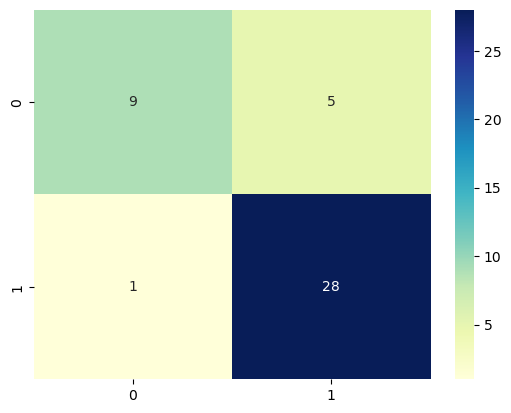

In [414]:
cm_1 = confusion_matrix(y_test, y_pred_1)
sns.heatmap(cm_1, annot=True, cmap = "YlGnBu")
plt.show()

In [415]:
report_1 = classification_report(y_test, y_pred_1)
print(report_1)

              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.85      0.97      0.90        29

    accuracy                           0.86        43
   macro avg       0.87      0.80      0.83        43
weighted avg       0.87      0.86      0.85        43



- **`RandomForestClassifier()`**

In [407]:
rf_clf = RandomForestClassifier()

In [416]:
rf_clf.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [417]:
y_pred_2 = rf_clf.predict(X_test_transformed)

In [418]:
accuracy_score(y_test, y_pred_2)

0.8837209302325582

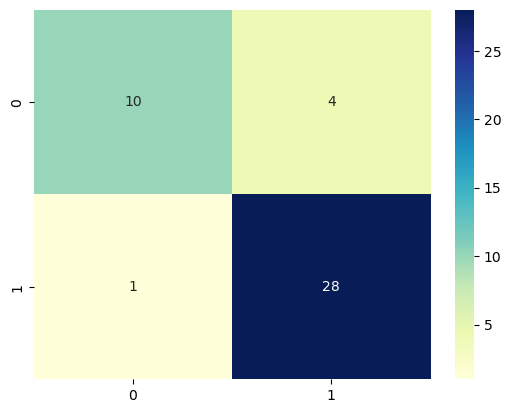

In [419]:
cm_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cm_2, annot=True, cmap = "YlGnBu")
plt.show()

In [420]:
report_2 = classification_report(y_test, y_pred_2)
print(report_2)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.88      0.97      0.92        29

    accuracy                           0.88        43
   macro avg       0.89      0.84      0.86        43
weighted avg       0.89      0.88      0.88        43



- **`LogisticRegression()`**

In [408]:
lg_clf = LogisticRegression()

In [421]:
lg_clf.fit(X_train_transformed, y_train)

LogisticRegression()

In [423]:
y_pred_3 = lg_clf.predict(X_test_transformed)

In [424]:
accuracy_score(y_test, y_pred_3)

0.9069767441860465

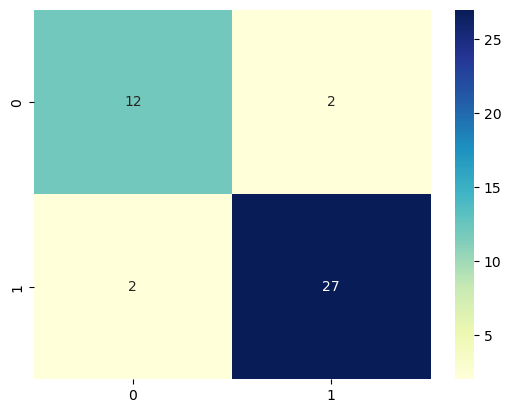

In [425]:
cm_3 = confusion_matrix(y_test, y_pred_3)
sns.heatmap(cm_3, annot=True, cmap = "YlGnBu")
plt.show()

In [426]:
report_3 = classification_report(y_test, y_pred_3)
print(report_3)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.93      0.93      0.93        29

    accuracy                           0.91        43
   macro avg       0.89      0.89      0.89        43
weighted avg       0.91      0.91      0.91        43



Regarding the classification problem, the logistic regression is the algoritm that is performing the best on the data.

# Conclusion

In this project, the objective was to predict a student's recruitment based on certain characteristics such as degrees, grades, course specialization, work experience, etc. 
We began by performing an exploratory data analysis to properly understand the data we obtained. Next, a regression problem is addressed to predict a student's future salary. We finished the project by performing a ranking problem that allows us to rank a student based on whether or not they will be placed.